In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [7]:
df = pd.read_csv('train.csv', index_col='id')

In [11]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
8536,34,NaN,divorced,basic.4y,no,no,no,cellular,nov,wed,73,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
28728,29,blue-collar,married,basic.9y,no,yes,no,cellular,jul,mon,104,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
9694,31,admin.,single,university.degree,no,yes,no,cellular,nov,fri,36,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
2170,44,entrepreneur,married,basic.6y,NaN,no,yes,telephone,jun,tue,75,4,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
21873,28,technician,married,professional.course,no,yes,no,telephone,may,tue,80,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
9763,43,admin.,married,university.degree,no,yes,no,cellular,aug,wed,115,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
32197,41,admin.,married,university.degree,no,no,no,cellular,jul,tue,184,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
18146,69,retired,married,high.school,no,no,no,cellular,nov,mon,178,1,999,0,nonexistent,-3.4,92.649,-30.1,0.715,5017.5,yes
2029,32,admin.,single,professional.course,no,yes,no,telephone,may,mon,16,11,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             36773 non-null  object 
 2   marital         37000 non-null  object 
 3   education       35505 non-null  object 
 4   default         29296 non-null  object 
 5   housing         36176 non-null  object 
 6   loan            36176 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp.var.rate    37069 non-null  float64
 16  cons.price.idx  37069 non-null  float64
 17  cons.conf.idx   37069 non-null 

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.023497,258.185492,2.566862,962.058189,0.173946,0.082222,93.576416,-40.505555,3.620484,5166.966047
std,10.412653,259.579105,2.765626,187.939691,0.497441,1.571009,0.578585,4.623600,1.735310,72.360902
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,36773,37000,35505,29296,36176,36176,37069,37069,37069,37069,37069
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9364,22424,10967,29293,19432,30518,23515,12424,7735,31989,32893


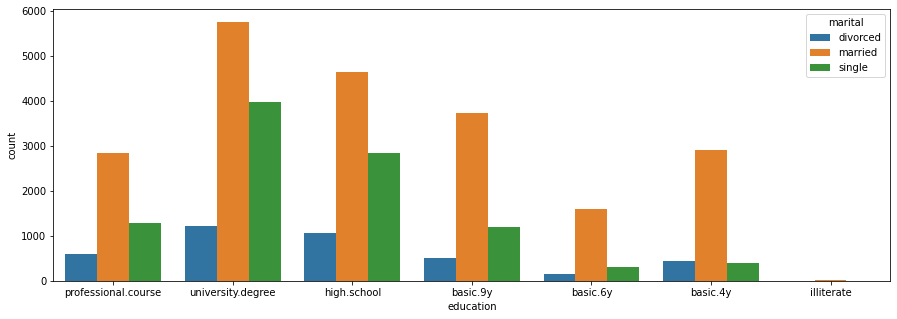

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='education', hue='marital')
plt.show()

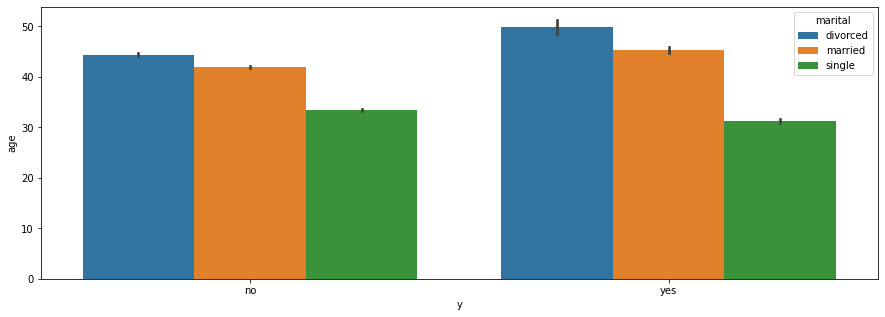

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='y', y='age', hue='marital')
plt.show()

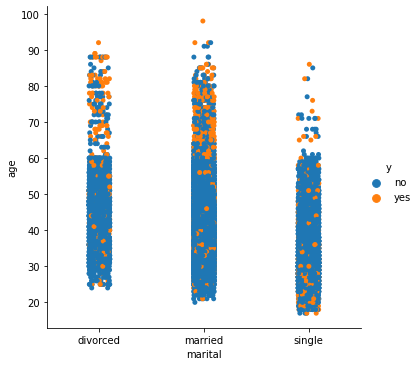

In [47]:
sns.catplot(data=df, x='marital', y='age', hue='y', jitter=1)
plt.show()

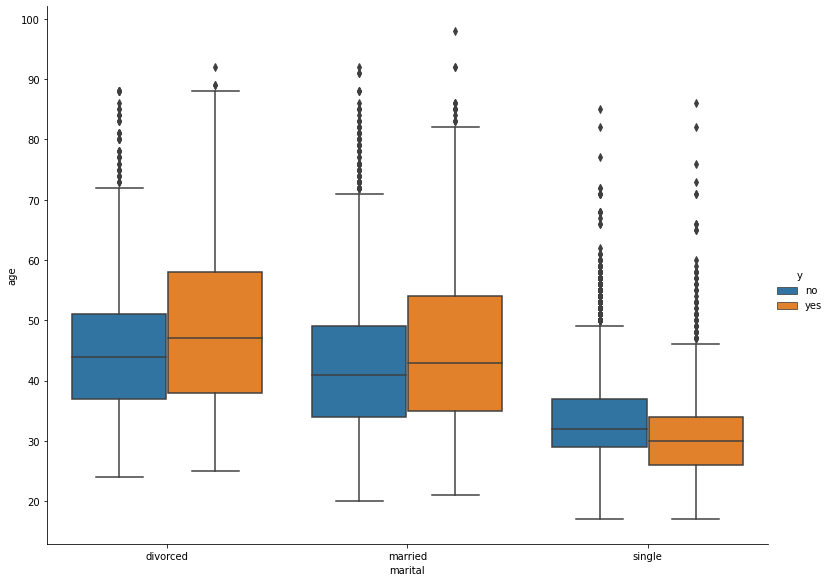

In [49]:
sns.catplot(data=df, x='marital', y='age', hue='y', kind='box', height=8, aspect=8/6)

In [59]:
df[df.duration<=1].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,48.000000,0.428571,3.142857,857.571429,0.571429,-0.728571,93.554143,-41.128571,2.259714,5091.942857
std,14.189198,0.534522,3.236694,374.184828,1.133893,1.390101,0.567678,5.338762,1.827621,101.199915
min,31.000000,0.000000,1.000000,9.000000,0.000000,-1.800000,92.893000,-47.100000,0.879000,4963.600000
25%,38.500000,0.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-46.650000,1.092500,5031.350000
50%,44.000000,0.000000,2.000000,999.000000,0.000000,-1.100000,93.444000,-37.500000,1.453000,5099.100000
75%,56.000000,1.000000,3.500000,999.000000,0.500000,0.000000,94.096500,-36.950000,3.168000,5145.050000
max,72.000000,1.000000,10.000000,999.000000,3.000000,1.400000,94.199000,-36.100000,4.965000,5228.100000


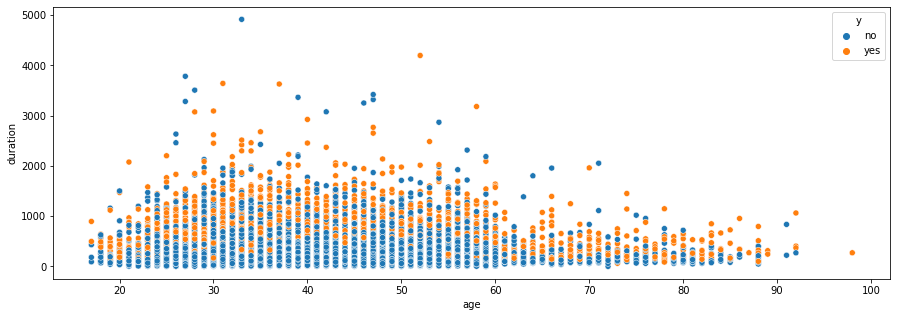

In [54]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='age', y='duration', hue='y')
plt.show()

In [60]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [61]:
for c in df.columns[df.dtypes == object]:
    df[c] = df[c].astype('category')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             37069 non-null  int64   
 1   job             36773 non-null  category
 2   marital         37000 non-null  category
 3   education       35505 non-null  category
 4   default         29296 non-null  category
 5   housing         36176 non-null  category
 6   loan            36176 non-null  category
 7   contact         37069 non-null  category
 8   month           37069 non-null  category
 9   day_of_week     37069 non-null  category
 10  duration        37069 non-null  int64   
 11  campaign        37069 non-null  int64   
 12  pdays           37069 non-null  int64   
 13  previous        37069 non-null  int64   
 14  poutcome        37069 non-null  category
 15  emp.var.rate    37069 non-null  float64 
 16  cons.price.idx  37069 non-null  float64 
 17  cons.conf.id

In [68]:
jobs = df.job.cat.categories

In [69]:
for c in jobs:
    print(c)

admin.
blue-collar
entrepreneur
housemaid
management
retired
self-employed
services
student
technician
unemployed


In [71]:
df.job.cat.codes

id
0        9
1        4
2        1
3        1
4        3
        ..
37064    7
37065    9
37066    0
37067    0
37068    0
Length: 37069, dtype: int8

In [ ]:
#Separa os labels do conjunto de parâmetros
y = train.y
X = train.drop('y', axis=1)

#Transforma as categorias em números
for col in X.columns:
    if X[col].dtype==object:
           X[col]= X[col].astype('category')


In [ ]:
for col in test.columns:
    if test[col].dtype==object:
           test[col]=test[col].astype('category')
           test[col]=test[col].cat.codes

In [ ]:
#Separa os labels do conjunto de parâmetros
y = train.y
X = train.drop('y', axis=1)
